In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Impedancia de una línea aerea de alta tensión

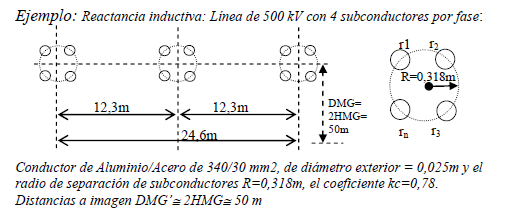

# Fórmulas
- $L= 2 * 10^{-4} \ln{\frac{DMG}{RMG}*\frac{2HMG}{DMG'}} $
- $DMG= \sqrt[n]{\prod\limits_{i=1}^n D_{ij}}$
- $RMG= \sqrt[n]{\prod\limits_{i=1}^n d_{ij}} = \sqrt[n]{n*r´*R^{(n-1)}}$


# DMG
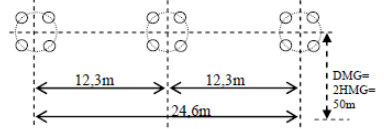

- $DMG= \sqrt[6]{ D_{1.2}*D_{1.3}*D_{2.1}*D_{2.3}*D_{3.1}*D_{3.2}}$



- $D_{1.2}=D_{2.1} , D_{1.3}=D_{3.1}, D_{2.3}=D_{3.2}$


- $DMG= \sqrt[6]{ D_{1.2}^2*D_{2.3}^2*D_{3.1}^2}$



- $DMG= \sqrt[3]{ D_{1.2}*D_{2.3}*D_{3.1}}$


In [3]:
D12=12
D23=12
D31=24
DMG= (D12*D23*D31)**(1/3)
print('DMG=',round(DMG,2),'m')

DMG= 15.12 m


# RMG
- $RMG= \sqrt[4]{ d_{1.1}*d_{1.2}*D_{1.3}*D_{1.4}}$

Analizando la geometría:
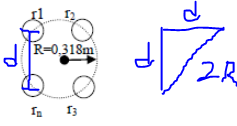
$(2R)^2=d^2+d^2 =>  d=\sqrt{2}R$

- $d_{1.1}=r'  $
- $d_{1.2}=d_{1.3}=d=\sqrt{2}R  $
- $d_{1.4}=2R$

- $RMG= \sqrt[4]{ r'*(\sqrt{2}R)^2*2R}$
- $RMG= \sqrt[4]{ 4*r'*R^3}$




In [5]:
d=0.0288
r=d/2
rc=r*0.78
R=0.318
RMG=(4*rc*R**3)**(1/4)
print('RMG=',round(RMG,3),'m')

RMG= 0.195 m


# xl

In [5]:
xl= 2*math.pi*50*2*10**(-4)*np.log(DMG/RMG)
print('Impedancia inductiva:',round(xl,3),'ohm/km')

Impedancia inductiva: 0.277 ohm/km


# Pruebas variando valores

In [5]:
def calculo_xl(D,R):
    
    DMG= (D*D*2*D)**(1/3)
    RMG=(4*rc*R**3)**(1/4)
    xl= 2*math.pi*50*2*10**(-4)*np.log(DMG/RMG)
    return xl
    
    

## R=cte , vario D

Text(0, 0.5, 'XL')

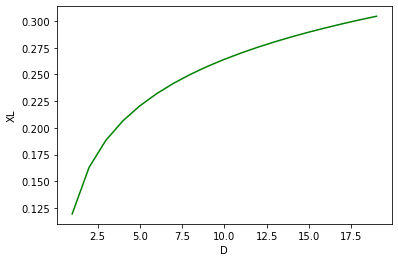

In [6]:
D=np.arange(1,20,1)
imp_xl=calculo_xl(D,0.318)
plt.plot(D,imp_xl,'g')
plt.xlabel('D')
plt.ylabel('XL')

## D=cte , vario R

Text(0, 0.5, 'XL')

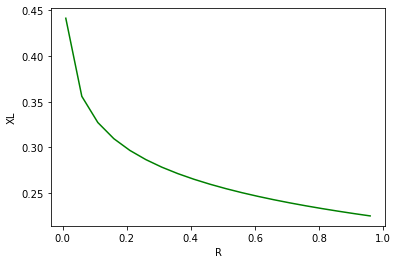

In [7]:
R=np.arange(rc,1,0.05)
imp_xl=calculo_xl(12.3,R)
plt.plot(R,imp_xl,'g')
plt.xlabel('R')
plt.ylabel('XL')

## Variando ambos

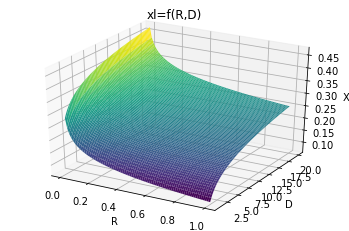

In [8]:
D=np.arange(1,20,0.25)
R=np.arange(rc,1,0.0125)

Dn, Rn=np.meshgrid(D,R)
XL=calculo_xl(Dn,Rn)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Rn, Dn, XL, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('xl=f(R,D)');
ax.set_xlabel('R')
ax.set_ylabel('D')
ax.set_zlabel('XL');

# Susceptancia capacitiva

In [9]:
RMGc=(4*r*R**3)**(1/4)
def calculo_bs(D,R):
    DMG= (D*D*2*D)**(1/3)
    RMGc=(4*r*R**3)**(1/4)
    bs= 17.47*10**(-6)/(np.log(DMG/RMGc))
    return bs

In [14]:
print('Susceptancia capativiva: ',round(calculo_bs(12.3,0.318),10),'siemens/km')

Susceptancia capativiva:  4.0171e-06 siemens/km


## Vario D, R=cte

Text(0, 0.5, 'BS')

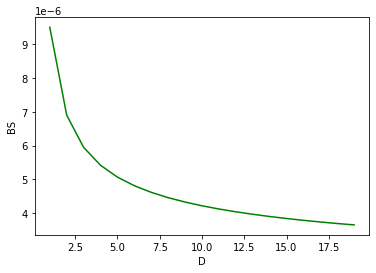

In [16]:
D=np.arange(1,20,1)
imp_bs=calculo_bs(D,0.318)
plt.plot(D,imp_bs,'g')
plt.xlabel('D')
plt.ylabel('BS')

E=U`2*BS

## Vario R, D=cte

Text(0, 0.5, 'BS')

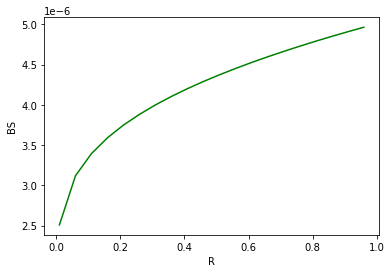

In [17]:
R=np.arange(rc,1,0.05)
imp_bs=calculo_bs(12.3,R)
plt.plot(R,imp_bs,'g')
plt.xlabel('R')
plt.ylabel('BS')